# Árvore de Decisão

* Uma **árvore de decisão** é uma representação de um conjunto de regras criado para tomar qualquer decisão, nesse caso, classificar um registro que envolva problemas de _classificação_ ou estimar um valor para problemas de _regressão_.

* Para cada problema da árvore, responde-se "Sim" ou "Não", guiando o modelo até a decisão final. Cada pergunta é chamada de **nó de decisão**, onde o primeiro é o **nó raíz** e a decisão é o **nó folha**.

* De maneira geral, a árvore de decisão é um decisão binária que tenta separar o dataset até conseguir uma **folha pura**, isto é, um nó que tenha apenas uma classe apenas.

<p align="center">
    <img src="download.png">
</p>

* Como exemplo, considere o dataset abaixo. Ele considera dois conjuntos de dados (eixo vertical e horizontal) com três diferentes **classes** que não são linearmente separavéis.
<p align="center">
    <img src="fig2.png">
</p>

* Cada traço de reta é uma **decisão** tomada.

### Como escolher?

* A maneira que a classificação é feita depende do **Ganho de Informação** (Information Gain), isto é, vamos considerar dois tipos distintos de classificação, $A$ e $B$, para um dataset. Assim, podemos atribuir o root node a esta classificação, gerando um "nó filho". O quanto de informação foi ganho pelas duas classificação?
    1. Entropia
        * Uma maneira é utilizar a medida de Entropia de Shannon:
        $$Entropy = -\sum_i p_i \log(p_i),$$
        onde $p_i$ é a probabilidade da classe $i$. Note que, o nó raiz possui entropia igual a 1, já que é o estado de maior desordem e com menos informação. Além disso, quanto mais perto a entropia está de 0, mais puro é o nó (pure node). Então é necessário calcular a entropia para cada nó e decidir baseado nesta medida qual será a classificação escolhida.

        Ganho de informação = $E(parent) - \sum_i w_i E(child_i)$, onde $w_i$ são os pesos da distribuição das classes em relação ao nó raiz. A divisão que possuir maior ganho de informação é a escolhida.

    2. Gini
        * Uma outra maneira é calcular o Gini, já que ele tem menor custo computacional em relação ao cáculo do $log$ na Entropia.
        $$G = 1 - \sum_i p_i^2,$$
        onde $p_i$ é a probabilidade da classe $i$. Assim, o ganho de informação é

        Ganho de informação = $G(parent) - \sum_i w_i G(child_i)$, onde $w_i$ são os pesos da distribuição das classes em relação ao nó raiz. A divisão que possuir maior ganho de informação é a escolhida.



* Para dataset utilizado no exemplo, temos:
<p align="center">
    <img src="fig3.png">
</p>

* X é o nosso dataset, sendo X[0] os dados no eixo horizontal e X[1] no eixo vertical. Aqui, são tomadas decisões iniciais baseadas em intervalos em relação a X[0];

* A árvore de decisão é uma representação de classificação, uma estrutura, mas somente ela não é considerado um Aprendizado de Máquina (ML). O que define ML é a escolha das regras de seleção para a criação da árvore:
    1. ID3
    2. C4.
    3. C5.0
    4. CART

- https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart
- O **scikit-learn**, segundo a própria documentação, usa uma **versão otimizada do CART (Classification and Regression Trees)**
    - De maneira geral, a seleção de nós é feita escolhendo qual recurso e limite vai tornar os **próximos passos** mais homogêneo possível.

- É um modelo que pode sofrer overfitting rapidamente.

### Árvore de Decisão por Classificação:

* Alvos categóricos para cada nó, prevendo a **classe majoritária** no nó pela distribuição de probabilidade, por exemplo;
* Ganho de informação baseado em **Entropia** ou **Gini**
* Métrica de validação do modelo: Acurácia

### Árvore de Decisão por Regressão:

* Alvo contínuo numérico, cada nó prevê a **a média dos valores** de $y$ naquele nó.
* Usa métricas de ganho de informação como Variance e escolhe o corte que minimiza este erro dentro do nó. Quanto maior o valor da variância, mais a impureza do nó.
$$Var = \frac{1}{N} \sum_{i=1}^N (y_i - \bar{y})^2$$
Aqui, $y_i$ é o target em teste e $\bar{y}$ é a média dos targets de treinamento no nó em análise. O ganho de informação para escolher qual divisão é melhor para o nó é considerar qual divisão possui a maior redução da variância em relação ao nó raiz:
$$Var Red = Var(parent) - \sum_i w_i Var(child_i),$$
onde $w_i$ são os pesos da distribuição das classes em relação ao nó raiz. A divisão que possuir tiver maior redução na Variância é a escolhida.
* Métrica de validação do modelo **Mean Squared Error**

- **Utilizando o dataset iris**
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [19]:
import pandas as pd

In [20]:
from sklearn.datasets import load_iris

data = load_iris()

In [23]:
# Iniciando o DataFrame do dataset iris

iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['target'] = data.target

iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [14]:
# Selecionando apenas as colunas de pétala e target
iris.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [24]:
# Filtro de target 0 e 1, relacionando apenas com duas dimensões

iris1 = iris.loc[iris.target.isin([0, 1]), ['petal length (cm)', 'petal width (cm)', 'target']]

In [33]:
# Separando x e y

x = iris1.drop('target', axis=1)
y = iris1.target

In [44]:
# Separando nossa base de dados em treino e teste utilizando o train_test_split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

* Podemos visualizar os dados de treino dessa base utilizando **matplotlib**

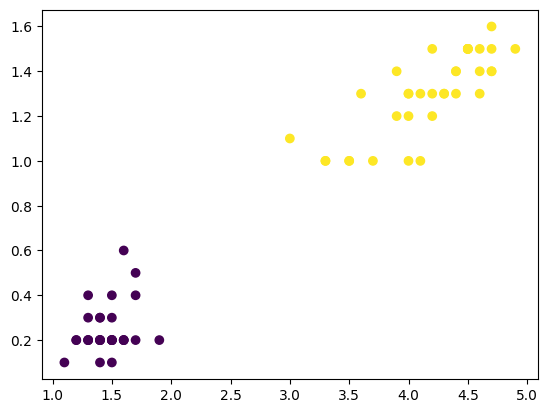

In [49]:
# Visualizando os dados de treino dessa base utilizando matplotlib

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], 
           X_train['petal width (cm)'], 
           c=y_train)

plt.show()